In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import hashlib
import spacy
import logging
from time import time
import nltk
nltk.download('stopwords')

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
#from google.colab import drive
#drive.mount('/content/drive')
dataset = pd.read_csv('dataset_bmm.csv')
dataset.head(20)

[nltk_data] Downloading package stopwords to /home/zhenya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,prompt,canonical_solution,model_response,target
0,<file_sep><fim_prefix>// Copyright 2020 The Go...,\t\tswitch x.Interface().(type) {,\t\t// False sorts before true.,False
1,<file_sep><fim_prefix>import re\nimport uuid\n...,"st.markdown(""---"")","if st.session_state[""mdl_json""]:",False
2,<file_sep><fim_prefix>package tlsrpt\nimport (...,func (p *parser) wsp() {,//../rfc/8460:374,False
3,"<file_sep><fim_prefix>import { describe, expec...",expect(() => (rect = new class_test.Rect()...,expect(() => (rect = new class_test.Rectan...,False
4,<file_sep><fim_prefix>import type {\n Default...,* Include or exclude stale queries,* Include queries matching this mutation key,False
5,<file_sep><fim_prefix>import { TreeGraphData }...,dimensions: ISemantic.IDimensionList;,defaultMetricId: number;,False
6,"<file_sep><fim_prefix>#include ""tachyon/c/zk/p...","tachyon_halo2_bn254_gwc_verifier* verifier,","tachyon_halo2_bn254_gwc_verifier* verifier,",True
7,<file_sep><fim_prefix>package prisma\nimport (...,"\terr = r.queries.CleanupStreamEvents(ctx, r.p...","\t_, err = r.queries.CleanupStreamEvents(ctx, tx)",False
8,<file_sep><fim_prefix>// Copyright 2019 The Go...,// on the current extension field.,// on the extension field being iterated over.,False
9,<file_sep><fim_prefix>// Copyright 2020 The Go...,\tEntryRanger interface{ Range(VisitEntry) },\tEntryRanger interface{ Range(VisitEntry) },True


In [145]:
def diogram(target):
  if target == True:
    return 1
  if target == False:
    return 0

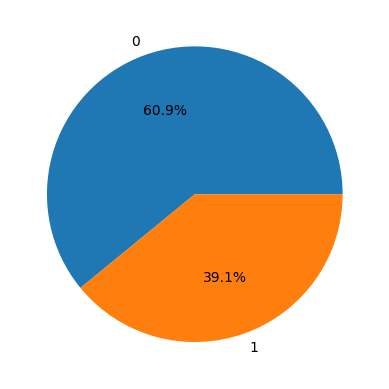

In [146]:
dataset['target'] = dataset['target'].apply(diogram)
plt.pie(dataset['target'].value_counts(), labels=dataset['target'].unique().tolist(), autopct='%1.1f%%')
plt.show()

In [147]:
dataset['prompt'] =  list(map(lambda x: x[22:], dataset['prompt']))
dataset['prompt'] =  list(map(lambda x: x[:-24], dataset['prompt']))

#dataset['promptz'] = dataset['prompt'].apply(clean)
moredata = pd.read_csv('processed_prompt_data.csv')
dataset['promptz'] = moredata


In [148]:
def corpus(text):
    text_list = text.split()
    return text_list

dataset['prompt_lists'] = dataset['promptz'].apply(corpus)
dataset.head(10)

,prompt,canonical_solution,model_response,target,promptz,prompt_lists
0,// Copyright 2020 The Go Authors. All rights r...,\t\tswitch x.Interface().(type) {,\t\t// False sorts before true.,0,copyright 2020 go author right reserved use so...,"[copyright, 2020, go, author, right, reserved,..."
1,import re\nimport uuid\nimport orjson\nimport ...,"st.markdown(""---"")","if st.session_state[""mdl_json""]:",0,import import uuid import orjson import stream...,"[import, import, uuid, import, orjson, import,..."
2,"package tlsrpt\nimport (\n\t""fmt""\n\t""net/url""...",func (p *parser) wsp() {,//../rfc/8460:374,0,package tlsrpt import fmt string extension add...,"[package, tlsrpt, import, fmt, string, extensi..."
3,"import { describe, expect, test } from '@jest/...",expect(() => (rect = new class_test.Rect()...,expect(() => (rect = new class_test.Rectan...,0,import describe expect test const require cons...,"[import, describe, expect, test, const, requir..."
4,"import type {\n DefaultError,\n Enabled,\n ...",* Include or exclude stale queries,* Include queries matching this mutation key,0,import type defaulterror enabled fetchstatus m...,"[import, type, defaulterror, enabled, fetchsta..."
5,import { TreeGraphData } from '@antv/g6-core';...,dimensions: ISemantic.IDimensionList;,defaultMetricId: number;,0,import treegraphdata import statusenum import ...,"[import, treegraphdata, import, statusenum, im..."
6,"#include ""tachyon/c/zk/plonk/halo2/bn254_gwc_v...","tachyon_halo2_bn254_gwc_verifier* verifier,","tachyon_halo2_bn254_gwc_verifier* verifier,",1,include include memory include utility include...,"[include, include, memory, include, utility, i..."
7,"package prisma\nimport (\n\t""context""\n\t""erro...","\terr = r.queries.CleanupStreamEvents(ctx, r.p...","\t_, err = r.queries.CleanupStreamEvents(ctx, tx)",0,package prisma import context error fmt type s...,"[package, prisma, import, context, error, fmt,..."
8,// Copyright 2019 The Go Authors. All rights r...,// on the current extension field.,// on the extension field being iterated over.,0,copyright 2019 go author right reserved use so...,"[copyright, 2019, go, author, right, reserved,..."
9,// Copyright 2020 The Go Authors. All rights r...,\tEntryRanger interface{ Range(VisitEntry) },\tEntryRanger interface{ Range(VisitEntry) },1,copyright 2020 go author right reserved use so...,"[copyright, 2020, go, author, right, reserved,..."


In [149]:
def last(x):
  x = x.split()
  return ' '.join(x[-256:])

dataset['prompt_last'] = dataset['promptz'].apply(last)
dataset.head(10)

,prompt,canonical_solution,model_response,target,promptz,prompt_lists,prompt_last
0,// Copyright 2020 The Go Authors. All rights r...,\t\tswitch x.Interface().(type) {,\t\t// False sorts before true.,0,copyright 2020 go author right reserved use so...,"[copyright, 2020, go, author, right, reserved,...",copyright 2020 go author right reserved use so...
1,import re\nimport uuid\nimport orjson\nimport ...,"st.markdown(""---"")","if st.session_state[""mdl_json""]:",0,import import uuid import orjson import stream...,"[import, import, uuid, import, orjson, import,...",import import uuid import orjson import stream...
2,"package tlsrpt\nimport (\n\t""fmt""\n\t""net/url""...",func (p *parser) wsp() {,//../rfc/8460:374,0,package tlsrpt import fmt string extension add...,"[package, tlsrpt, import, fmt, string, extensi...",len ruas rua range ruas l b l p range b return...
3,"import { describe, expect, test } from '@jest/...",expect(() => (rect = new class_test.Rect()...,expect(() => (rect = new class_test.Rectan...,0,import describe expect test const require cons...,"[import, describe, expect, test, const, requir...",import describe expect test const require cons...
4,"import type {\n DefaultError,\n Enabled,\n ...",* Include or exclude stale queries,* Include queries matching this mutation key,0,import type defaulterror enabled fetchstatus m...,"[import, type, defaulterror, enabled, fetchsta...",import type defaulterror enabled fetchstatus m...
5,import { TreeGraphData } from '@antv/g6-core';...,dimensions: ISemantic.IDimensionList;,defaultMetricId: number;,0,import treegraphdata import statusenum import ...,"[import, treegraphdata, import, statusenum, im...",imetriclist model idatasourceitem type idomain...
6,"#include ""tachyon/c/zk/plonk/halo2/bn254_gwc_v...","tachyon_halo2_bn254_gwc_verifier* verifier,","tachyon_halo2_bn254_gwc_verifier* verifier,",1,include include memory include utility include...,"[include, include, memory, include, utility, i...",include include memory include utility include...
7,"package prisma\nimport (\n\t""context""\n\t""erro...","\terr = r.queries.CleanupStreamEvents(ctx, r.p...","\t_, err = r.queries.CleanupStreamEvents(ctx, tx)",0,package prisma import context error fmt type s...,"[package, prisma, import, context, error, fmt,...",package prisma import context error fmt type s...
8,// Copyright 2019 The Go Authors. All rights r...,// on the current extension field.,// on the extension field being iterated over.,0,copyright 2019 go author right reserved use so...,"[copyright, 2019, go, author, right, reserved,...",copyright 2019 go author right reserved use so...
9,// Copyright 2020 The Go Authors. All rights r...,\tEntryRanger interface{ Range(VisitEntry) },\tEntryRanger interface{ Range(VisitEntry) },1,copyright 2020 go author right reserved use so...,"[copyright, 2020, go, author, right, reserved,...",copyright 2020 go author right reserved use so...


In [150]:
from gensim.models import Word2Vec
import multiprocessing
from gensim.models.phrases import Phrases, Phraser
import logging

cores = multiprocessing.cpu_count()

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
import warnings
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, fbeta_score, precision_score, fbeta_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, make_scorer
from sklearn.datasets import load_iris, load_diabetes
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from gensim.models.word2vec import Word2Vec, LineSentence
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [152]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    f1_score,
    fbeta_score,
    precision_score,
    roc_auc_score,
    make_scorer,
)
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer


In [153]:
def get_scores(y_true, y_pred) -> pd.Series:
    return pd.Series(np.array([accuracy_score(y_true, y_pred),
                     recall_score(y_true, y_pred),
                     f1_score(y_true, y_pred),
                     precision_score(y_true, y_pred),
                     fbeta_score(y_true, y_pred, beta=1.25),
                     roc_auc_score(y_true, y_pred)]),
                     index=['Accuracy', 'Recall', 'F1', 'Precision', 'F_beta', 'ROC_AUC'])

In [154]:
def optimize_pipeline(df_features, target, param_grid, modelSignature, beta=1.25):

    # Разделяем данные на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(
        df_features, target, test_size=0.2, random_state=42, stratify=target
    )
    # Стратифицированное разделение данных на обучающую и тестовую выборки гарантирует,
    # что в каждой из выборок будет представлено одинаковое соотношение классов.

    # Создаем пайплайн
    pipeline = Pipeline(
        [
            ("normalizer", Normalizer()),
            modelSignature,
        ]
    )

    # Определяем метрику f_beta
    scorer = make_scorer(fbeta_score, beta=beta)

    # Создаем кросс-валидатор
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Создаем GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=cv,
        scoring=scorer,
        n_jobs=-1,
        verbose=10,
        error_score="raise",
    )

    # Обучаем GridSearchCV
    grid_search.fit(X_train, y_train)

    # Проверяем лучшую модель на тестовой выборке
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_score = fbeta_score(y_test, y_pred, beta=beta)

    print("F_beta score on test set: ", test_score)
    print("best params: ", grid_search.best_params_)
    return best_model, get_scores(y_test, y_pred)


In [155]:
X=dataset['promptz']
Y=dataset['target']
#Splitting the data such that 33% will be used for testing and the remaining 80% will be used for training. 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.2)

In [156]:
df_clean = x_train #pd.DataFrame({'clean': txt}) 
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(5278,)

In [157]:
sent2 = [row.split() for row in df_clean]

In [158]:
phrases2 = Phrases(sent2, min_count=30, progress_per=10000)

In [159]:
bigram = Phraser(phrases2)
sentences2 = bigram[sent2]

In [160]:
t = time()

w2v_model = Word2Vec(min_count=20, window=5, sg=0, vector_size=300, sample=6e-5, alpha=0.03, min_alpha=0.0007, negative=20, workers=-1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.0 mins


In [161]:
t = time()

w2v_model.build_vocab(sentences2, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.01 mins


In [162]:
t = time()

w2v_model.train(sentences2, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.09 mins


In [163]:
w2v_model.init_sims(replace=True)

/tmp/ipykernel_55466/514372312.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [164]:
vocab=list(w2v_model.wv.key_to_index.keys())

In [165]:
from tqdm import tqdm

def avg_w2vec(sentences):
    """
    This Function is using Average Word2Vec approach for creating a numerical vector for a given review from the word embeddings of each words of the review.
    """
    transformed=[]
    for sentence in tqdm(sentences):
        count=0
        vector=np.zeros(300)
        for word in sentence.split():
            if word in vocab:
                vector+=w2v_model.wv.get_vector(word)
                count+=1
        if count!=0:
            vector/=count
            transformed.append(vector)
    return np.array(transformed)

In [166]:
x_train_transformed=avg_w2vec(x_train)
x_test_transformed=avg_w2vec(x_test)

100%|██████████| 1333/1333 [00:03<00:00, 344.08it/s]


In [167]:
dataset.head()

,prompt,canonical_solution,model_response,target,promptz,prompt_lists,prompt_last
0,// Copyright 2020 The Go Authors. All rights r...,\t\tswitch x.Interface().(type) {,\t\t// False sorts before true.,0,copyright 2020 go author right reserved use so...,"[copyright, 2020, go, author, right, reserved,...",copyright 2020 go author right reserved use so...
1,import re\nimport uuid\nimport orjson\nimport ...,"st.markdown(""---"")","if st.session_state[""mdl_json""]:",0,import import uuid import orjson import stream...,"[import, import, uuid, import, orjson, import,...",import import uuid import orjson import stream...
2,"package tlsrpt\nimport (\n\t""fmt""\n\t""net/url""...",func (p *parser) wsp() {,//../rfc/8460:374,0,package tlsrpt import fmt string extension add...,"[package, tlsrpt, import, fmt, string, extensi...",len ruas rua range ruas l b l p range b return...
3,"import { describe, expect, test } from '@jest/...",expect(() => (rect = new class_test.Rect()...,expect(() => (rect = new class_test.Rectan...,0,import describe expect test const require cons...,"[import, describe, expect, test, const, requir...",import describe expect test const require cons...
4,"import type {\n DefaultError,\n Enabled,\n ...",* Include or exclude stale queries,* Include queries matching this mutation key,0,import type defaulterror enabled fetchstatus m...,"[import, type, defaulterror, enabled, fetchsta...",import type defaulterror enabled fetchstatus m...


In [168]:
#y_train = y_train[:-1]
#y_test = y_test[:-1]

In [169]:
grid_params = { 'n_neighbors' : [2,3,5,10,15,20,25,30,40,50,60,100,150],
               'metric' : ['cosine']}
dataset['target']=dataset['target'].astype(dtype=int).astype(dtype='category')
knn=KNeighborsClassifier()
scorer = make_scorer(fbeta_score, beta=1.25)
#clf = RandomizedSearchCV(knn, grid_params, random_state=42,n_jobs=-1,verbose=1, scoring=scorer)
#clf.fit(x_train_transformed,y_train[:len(x_train_transformed)])
#clf.fit(x_test_transformed,y_test[:len(x_test_transformed)])

clf = GridSearchCV(knn, grid_params,n_jobs=-1,verbose=1, scoring=scorer)#, random_state=42,)
clf.fit(x_train_transformed,y_train[:len(x_train_transformed)])
best_model = clf.best_estimator_
y_pred = best_model.predict(x_test_transformed)
test_score = fbeta_score(y_test[:len(x_test_transformed)], y_pred, beta=1.25)
    
print("F_beta score on test set: ", test_score)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
F_beta score on test set:  0.39018886436104977


In [170]:
clf.best_params_

{'metric': 'cosine', 'n_neighbors': 3}

In [171]:
clf.best_score_

0.34798674913065586

In [172]:
clf.cv_results_

{'mean_fit_time': array([0.01725917, 0.0205502 , 0.01849756, 0.01159997, 0.01128702,
        0.01323395, 0.02666593, 0.02483144, 0.01456351, 0.01422353,
        0.01643486, 0.01779509, 0.02328248]),
 'std_fit_time': array([0.00703361, 0.00789366, 0.00837564, 0.00104697, 0.0018347 ,
        0.00477027, 0.0103779 , 0.01311055, 0.00855222, 0.00714913,
        0.00932097, 0.00782582, 0.01274489]),
 'mean_score_time': array([0.54093137, 0.61492176, 0.50181308, 0.53307462, 0.43568249,
        0.49353576, 0.6443047 , 0.63904471, 0.47207813, 0.45333447,
        0.4335598 , 0.46427226, 0.41126094]),
 'std_score_time': array([0.18338106, 0.16537924, 0.13820319, 0.1444604 , 0.02755052,
        0.13796582, 0.2106185 , 0.20230871, 0.15690172, 0.09438908,
        0.0833879 , 0.04281609, 0.03033907]),
 'param_metric': masked_array(data=['cosine', 'cosine', 'cosine', 'cosine', 'cosine',
                    'cosine', 'cosine', 'cosine', 'cosine', 'cosine',
                    'cosine', 'cosine', 'cosin

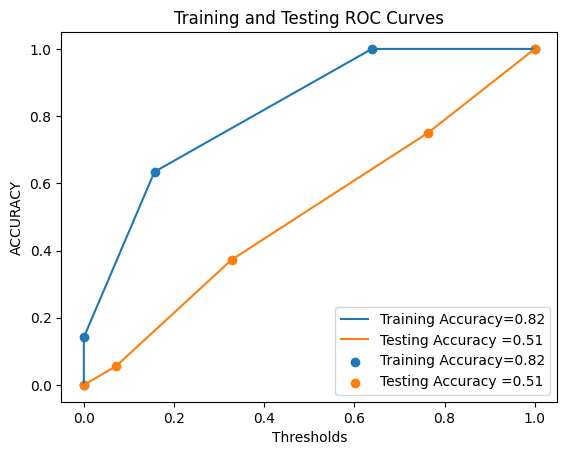

In [173]:
from sklearn.metrics import roc_curve, auc,classification_report,confusion_matrix
train_fpr,train_tpr,thresholds=roc_curve(y_train[:len(x_train_transformed)],clf.predict_proba(x_train_transformed)[:,1])
test_fpr,test_tpr,thresholds=roc_curve(y_test[:len(x_test_transformed)],clf.predict_proba(x_test_transformed)[:,1])
import matplotlib.pyplot as plt
plt.plot(train_fpr,train_tpr,label="Training Accuracy="+str(round(auc(train_fpr, train_tpr),2)))
plt.plot(test_fpr,test_tpr,label="Testing Accuracy ="+str(round(auc(test_fpr, test_tpr),2)))
plt.scatter(train_fpr,train_tpr,label="Training Accuracy="+str(round(auc(train_fpr, train_tpr),2)))
plt.scatter(test_fpr,test_tpr,label="Testing Accuracy ="+str(round(auc(test_fpr, test_tpr),2)))
plt.legend()
plt.xlabel("Thresholds")
plt.ylabel("ACCURACY")
plt.title("Training and Testing ROC Curves")
plt.show()

In [174]:
print(classification_report(y_train[:len(x_train_transformed)],clf.predict(x_train_transformed)))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      3247
           1       0.72      0.63      0.68      2081

    accuracy                           0.76      5328
   macro avg       0.75      0.74      0.74      5328
weighted avg       0.76      0.76      0.76      5328



In [175]:
print(classification_report(y_test[:len(x_test_transformed)],clf.predict(x_test_transformed),))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       812
           1       0.42      0.37      0.40       521

    accuracy                           0.56      1333
   macro avg       0.52      0.52      0.52      1333
weighted avg       0.55      0.56      0.55      1333



In [176]:
get_scores(y_train[:len(x_train_transformed)], clf.predict(x_train_transformed))

Accuracy     0.761637
Recall       0.634310
F1           0.675192
Precision    0.721706
F_beta       0.665773
ROC_AUC      0.738775
dtype: float64

In [177]:
get_scores(y_test[:len(x_test_transformed)], clf.predict(x_test_transformed))

Accuracy     0.555139
Recall       0.372361
F1           0.395515
Precision    0.421739
F_beta       0.390189
ROC_AUC      0.522387
dtype: float64

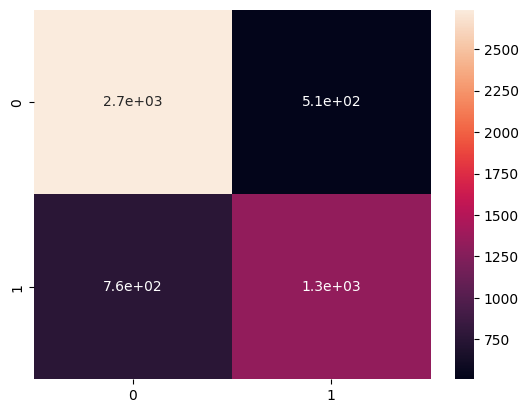

In [178]:
sns.heatmap(confusion_matrix(y_train[:len(x_train_transformed)],clf.predict(x_train_transformed)),annot=True)
plt.show()

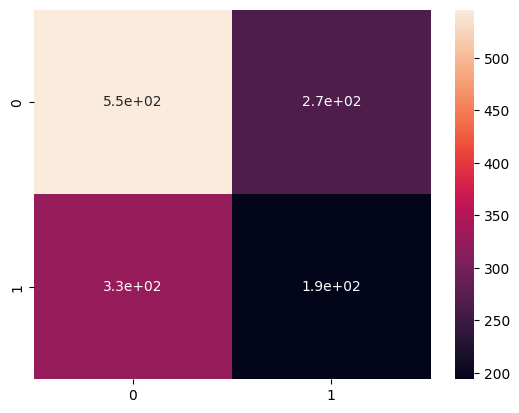

In [179]:
sns.heatmap(confusion_matrix(y_test[:len(x_test_transformed)],clf.predict(x_test_transformed)),annot=True)
plt.show()

In [180]:
2.2 < 3.5

True

In [181]:
from catboost import CatBoostClassifier, Pool
train_dataset = Pool(x_train_transformed, y_train[:len(x_train_transformed)])
val_dataset = Pool(x_test_transformed, y_test[:len(x_test_transformed)])

cat_default = CatBoostClassifier(eval_metric='F:beta=1.25')
cat_default.fit(train_dataset, use_best_model=True, eval_set=val_dataset)

print(f'F_1.25 score - {fbeta_score(y_test[:len(x_test_transformed)], cat_default.predict(val_dataset), beta=1.25)}')


Learning rate set to 0.047904
0:	learn: 0.0480818	test: 0.0185674	best: 0.0185674 (0)	total: 26.6ms	remaining: 26.6s
1:	learn: 0.0286654	test: 0.0062117	best: 0.0185674 (0)	total: 37.3ms	remaining: 18.6s
2:	learn: 0.0272312	test: 0.0093288	best: 0.0185674 (0)	total: 47.8ms	remaining: 15.9s
3:	learn: 0.0179766	test: 0.0000000	best: 0.0185674 (0)	total: 57.9ms	remaining: 14.4s
4:	learn: 0.0187697	test: 0.0031401	best: 0.0185674 (0)	total: 68ms	remaining: 13.5s
5:	learn: 0.0148820	test: 0.0124838	best: 0.0185674 (0)	total: 78.2ms	remaining: 12.9s
6:	learn: 0.0117670	test: 0.0124990	best: 0.0185674 (0)	total: 88.3ms	remaining: 12.5s
7:	learn: 0.0117670	test: 0.0062572	best: 0.0185674 (0)	total: 99.4ms	remaining: 12.3s
8:	learn: 0.0102043	test: 0.0062725	best: 0.0185674 (0)	total: 110ms	remaining: 12.1s
9:	learn: 0.0078567	test: 0.0062725	best: 0.0185674 (0)	total: 120ms	remaining: 11.9s
10:	learn: 0.0078567	test: 0.0031401	best: 0.0185674 (0)	total: 131ms	remaining: 11.7s
11:	learn: 0.0133

In [182]:
# # param_grid = {
# #     'depth': [2, 3, 4, 5],
# #     'learning_rate': [0.02, 0.03, 0.04, 0.1],
# #     'iterations' : [100, 300, 500, 800, 1000],
# #     'bagging_temperature' : [1, 1.2, 1.5]
# #     }
# param_grid = {
#     'depth': [2, 3, 4, 5],
#     'learning_rate': [0.02, 0.03, 0.04, 0.1],
#     'iterations' : [100, 300, 500, 800, 1000],
#     'bagging_temperature' : [1, 1.2, 1.5]
#     }
# base_params = {
#     'logging_level':'Silent',
#     'loss_function':'Logloss',
#     'l2_leaf_reg': 3,
#     'random_strength': 1.2,
#     'eval_metric': 'F:beta=1.25', 
#     'random_state': 42,
# }
# cat_param = CatBoostClassifier(**base_params)
# search = cat_param.grid_search(param_grid, train_dataset, cv=5)
# cat_param.fit(train_dataset, use_best_model=True, eval_set=val_dataset)

In [183]:
# get_scores(y_test, cat_param.predict(val_dataset))

In [184]:
# def experiment_prob (model, X_train, X_test, y_train, y_test):
#   y_train_predict_proba_0 = model.predict_proba(X_train)[:, 0]
#   proba_opt = 0.5
#   proba_change = 0.51
#   f_beta_old = get_scores(y_train, model.predict(X_train))['F_beta']
#   f_beta_new = f_beta_old
#   while ( f_beta_old <= f_beta_new ):
#     y_train_predict_proba_b_change = np.ones(len(y_train_predict_proba_0))
#     y_train_predict_proba_b_change[y_train_predict_proba_0 > proba_change] = 0
#     f_beta_old = f_beta_new
#     f_beta_new = get_scores(y_train, y_train_predict_proba_b_change)['F_beta']
#     proba_change = proba_change + 0.01

#   y_test_predict_proba_0 = model.predict_proba(X_test)[:, 0]
#   y_test_predict_proba_b_proba_change = np.ones(len(y_test_predict_proba_0))
#   y_test_predict_proba_b_proba_change[y_test_predict_proba_0 > proba_change] = 0

#   return proba_change, get_scores(y_test, y_test_predict_proba_b_proba_change)

In [185]:
def experiment_prob (model, X_train, X_test, y_train, y_test):
  y_train_predict_proba_1 = model.predict_proba(X_train)[:, 1]
  f_beta_opt = get_scores(y_train, model.predict(X_train))['F_beta']
  proba_opt = 0
  for change100 in range (0, 100):
    change = change100/100
    y_train_predict_proba_b_change = np.zeros(len(y_train_predict_proba_1))
    y_train_predict_proba_b_change[y_train_predict_proba_1 > change] = 1
    f_beta_new = get_scores(y_train, y_train_predict_proba_b_change)['F_beta']
    if (f_beta_new > f_beta_opt):
      f_beta_opt = f_beta_new
      proba_opt = change

  y_test_predict_proba_1 = model.predict_proba(X_test)[:, 1]
  y_test_predict_proba_b_proba_opt = np.zeros(len(y_test_predict_proba_1))
  y_test_predict_proba_b_proba_opt[y_test_predict_proba_1 > proba_opt] = 1

  return proba_opt, get_scores(y_test, y_test_predict_proba_b_proba_opt)

In [186]:
proba_change, scores = experiment_prob(best_model, x_train_transformed, x_test_transformed, y_train[:len(x_train_transformed)], y_test[:len(x_test_transformed)])
proba_change, scores

(0.0,
 Accuracy     0.437359
 Recall       0.750480
 F1           0.510444
 Precision    0.386746
 F_beta       0.548988
 ROC_AUC      0.493467
 dtype: float64)

# additional w2v model on 50 last words

In [207]:
X2=dataset['prompt_last']
Y2=dataset['target']
#Splitting the data such that 33% will be used for testing and the remaining 67% will be used for training. 
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test=train_test_split(X2,Y2,stratify=Y2,test_size=0.2)

In [208]:
df_clean1 =  dataset['prompt_last']
df_clean1 = df_clean1.dropna().drop_duplicates()
df_clean1.shape

(6600,)

In [209]:
sent1 = [row.split() for row in df_clean1]

In [210]:
phrases1 = Phrases(sent1, min_count=30, progress_per=10000)

In [211]:
bigram1 = Phraser(phrases1)
sentences1 = bigram1[sent1]

In [212]:
w2v_model_1 = Word2Vec(min_count=20, window=2, sample=6e-5, vector_size=300, alpha=0.03, min_alpha=0.0007, negative=20, workers=-1)

In [213]:
t = time()

w2v_model_1.build_vocab(sentences1, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.01 mins


In [214]:
t = time()

w2v_model_1.train(sentences1, total_examples=w2v_model_1.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.07 mins


In [215]:
w2v_model_1.init_sims(replace=True)


/tmp/ipykernel_55466/3602180844.py:1: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model_1.init_sims(replace=True)


In [216]:
vocab2=list(w2v_model_1.wv.key_to_index.keys())


In [217]:
def avg_w2vec2(sentences):
    """
    This Function is using Average Word2Vec approach for creating a numerical vector for a given review from the word embeddings of each words of the review.
    """
    transformed1=[]
    for sentence in tqdm(sentences):
        count1=0
        vector1=np.zeros(300)
        for word in sentence.split():
            if word in vocab2:
                vector1+=w2v_model_1.wv.get_vector(word)
                count1+=1
        if count1!=0:
            vector1/=count1
            transformed1.append(vector1)
    return np.array(transformed1)

In [218]:
x2_train_transformed=avg_w2vec2(x2_train)
x2_test_transformed=avg_w2vec2(x2_test)

100%|██████████| 1333/1333 [00:02<00:00, 570.42it/s]


In [219]:
grid_params = { 'n_neighbors' : [2,3,5,10,15,20,25,30,40,50,60,100,150],
               'metric' : ['cosine']}
knn=KNeighborsClassifier()
scorer = make_scorer(fbeta_score, beta=1.25)

#clf = RandomizedSearchCV(knn, grid_params, random_state=42,n_jobs=-1,verbose=1, scoring=scorer)
#clf.fit(x2_train_transformed,y2_train[:len(x2_train_transformed)])
#clf.fit(x2_test_transformed,y2_test[:len(x2_test_transformed)])


clf = GridSearchCV(knn, grid_params,n_jobs=-1,verbose=1, scoring=scorer)#, random_state=42,)
clf.fit(x2_train_transformed,y2_train[:len(x2_train_transformed)])
best_model = clf.best_estimator_
y2_pred = best_model.predict(x2_test_transformed)
test_score = fbeta_score(y2_test[:len(x2_test_transformed)], y2_pred, beta=1.25)
    
print("F_beta score on test set: ", test_score)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
F_beta score on test set:  0.4098990396454075


In [220]:
clf.best_params_

{'metric': 'cosine', 'n_neighbors': 3}

In [221]:
clf.best_score_

0.40499378261659247

In [222]:
clf.cv_results_

{'mean_fit_time': array([0.01021938, 0.0138587 , 0.01245499, 0.01501117, 0.02006812,
        0.02091312, 0.01902981, 0.01031542, 0.01284099, 0.01997471,
        0.01705666, 0.01229763, 0.01381536]),
 'std_fit_time': array([0.00394173, 0.00254937, 0.00225398, 0.00465393, 0.00574962,
        0.00376388, 0.0102214 , 0.00163598, 0.00185752, 0.00503906,
        0.00535439, 0.00370279, 0.00356247]),
 'mean_score_time': array([0.74400043, 0.55908499, 0.61023955, 0.47075958, 0.55217791,
        0.77609024, 0.57417278, 0.4721879 , 0.42575636, 0.60829062,
        0.55573754, 0.50854363, 0.45496778]),
 'std_score_time': array([0.03068913, 0.12725507, 0.1297642 , 0.02208691, 0.11730238,
        0.02862765, 0.13626241, 0.01509738, 0.01096128, 0.09730418,
        0.09358692, 0.08138509, 0.04155865]),
 'param_metric': masked_array(data=['cosine', 'cosine', 'cosine', 'cosine', 'cosine',
                    'cosine', 'cosine', 'cosine', 'cosine', 'cosine',
                    'cosine', 'cosine', 'cosin

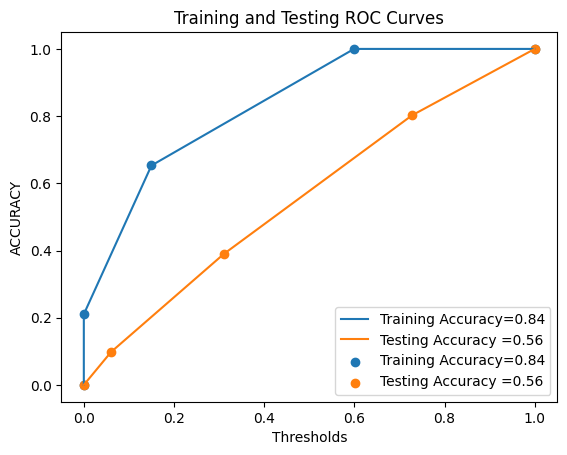

In [223]:
from sklearn.metrics import roc_curve, auc,classification_report,confusion_matrix
train_fpr,train_tpr,thresholds=roc_curve(y2_train[:len(x2_train_transformed)],clf.predict_proba(x2_train_transformed)[:,1])
test_fpr,test_tpr,thresholds=roc_curve(y2_test[:len(x2_test_transformed)],clf.predict_proba(x2_test_transformed)[:,1])
import matplotlib.pyplot as plt
plt.plot(train_fpr,train_tpr,label="Training Accuracy="+str(round(auc(train_fpr, train_tpr),2)))
plt.plot(test_fpr,test_tpr,label="Testing Accuracy ="+str(round(auc(test_fpr, test_tpr),2)))
plt.scatter(train_fpr,train_tpr,label="Training Accuracy="+str(round(auc(train_fpr, train_tpr),2)))
plt.scatter(test_fpr,test_tpr,label="Testing Accuracy ="+str(round(auc(test_fpr, test_tpr),2)))
plt.legend()
plt.xlabel("Thresholds")
plt.ylabel("ACCURACY")
plt.title("Training and Testing ROC Curves")
plt.show()

In [224]:
get_scores(y2_train[:len(x2_train_transformed)], clf.predict(x2_train_transformed))

Accuracy     0.773086
Recall       0.653051
F1           0.692131
Precision    0.736186
F_beta       0.683157
ROC_AUC      0.751533
dtype: float64

In [225]:
get_scores(y2_test[:len(x2_test_transformed)], clf.predict(x2_test_transformed))

Accuracy     0.572393
Recall       0.389635
F1           0.415984
Precision    0.446154
F_beta       0.409899
ROC_AUC      0.539645
dtype: float64

фейк рез ниже 

In [227]:
z, v = experiment_prob(best_model, x2_train_transformed, x2_train_transformed, y2_train[:len(x2_train_transformed)], y2_train[:len(x2_train_transformed)])
z, v

(0.0,
 Accuracy     0.634760
 Recall       1.000000
 F1           0.681401
 Precision    0.516762
 F_beta       0.732640
 ROC_AUC      0.700339
 dtype: float64)